In [ ]:
!nvidia-smi

Mon Feb 12 23:00:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!python --version

Python 3.10.12


In [ ]:
# !pip install tensorflow==2.9.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
import json
from zipfile import ZipFile

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
# import os
# import shutil
# from os import listdir
# from random import shuffle
# import json
# from zipfile import ZipFile
# from PIL import Image

# import numpy as np
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# from tensorflow.keras import layers, models

In [ ]:
shutil.rmtree('sample_data', ignore_errors=False, onerror=None)

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("drive/MyDrive/kaggle/kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="N7dqYPjVvAq1XZgHHKw7")

In [ ]:
def unzipAndDelete(zipName):
  with ZipFile(zipName, 'r') as zip_ref:
    zip_ref.extractall()
  os.remove(zipName)

In [ ]:
destination_folder = 'final_dataset/'
def moveFolders(source_folder_train, source_folder_test, subfolder_names, delete_folder):
  for sub_folder in subfolder_names:
    shutil.copytree(source_folder_train + sub_folder, destination_folder + sub_folder, dirs_exist_ok=True)
    if not len(source_folder_test) == 0:
      shutil.copytree(source_folder_test + sub_folder, destination_folder + sub_folder, dirs_exist_ok=True)
  shutil.rmtree(delete_folder, ignore_errors=False, onerror=None)

In [ ]:
# !kaggle datasets download -d amellia/face-skin-disease

In [ ]:
# unzipAndDelete('face-skin-disease.zip')

In [ ]:
# moveFolders('DATA/train/', 'DATA/testing/', ['Acne','Rosacea'], 'DATA')

In [ ]:
# !kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

In [ ]:
# unzipAndDelete('skin-cancer9-classesisic.zip')

In [ ]:
# moveFolders('Skin cancer ISIC The International Skin Imaging Collaboration/Train/', 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/', ['squamous cell carcinoma', 'nevus', 'actinic keratosis'], 'Skin cancer ISIC The International Skin Imaging Collaboration')

In [ ]:
# !kaggle datasets download -d subirbiswas19/skin-disease-dataset

In [ ]:
# unzipAndDelete('skin-disease-dataset.zip')

In [ ]:
# moveFolders('skin-disease-datasaet/train_set/', 'skin-disease-datasaet/test_set/', ['BA- cellulitis', 'VI-chickenpox'], 'skin-disease-datasaet')

In [ ]:
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset

100% 5.17G/5.19G [00:57<00:00, 110MB/s] 
100% 5.19G/5.19G [00:57<00:00, 97.3MB/s]


In [ ]:
unzipAndDelete('skin-diseases-image-dataset.zip')

In [ ]:
moveFolders('IMG_CLASSES/', '', ['7. Psoriasis pictures Lichen Planus and related diseases - 2k', '1. Eczema 1677', '2. Melanoma 15.75k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k'], 'IMG_CLASSES')

In [ ]:
!kaggle datasets download -d artakusuma/basedir

100% 5.50G/5.50G [01:11<00:00, 99.3MB/s]
100% 5.50G/5.50G [01:11<00:00, 82.4MB/s]


In [ ]:
unzipAndDelete('basedir.zip')

In [ ]:
moveFolders('base_dir/train_dir/', 'base_dir/val_dir/', ['bcc', 'nv', 'akiec'], 'base_dir')

In [ ]:
# !kaggle datasets download -d shubhamgoel27/dermnet

In [ ]:
# unzipAndDelete('dermnet.zip')

In [ ]:
# moveFolders('train/', 'test/', ['Acne and Rosacea Photos'], 'train')
# shutil.rmtree('test', ignore_errors=False, onerror=None)

In [ ]:
# source_dir = 'final_dataset/Acne and Rosacea Photos'
# print(len(os.listdir(source_dir)))

In [ ]:
# for imageName in os.listdir(source_dir):
#   if 'rosacea' not in imageName.lower():
#     os.remove(os.path.join(source_dir, imageName))

In [ ]:
# print(len(os.listdir(source_dir)))

In [ ]:
project = rf.workspace("muhammad-risma-nqgw8").project("acne04-cwqkv")
project.version(3).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ACNE04-3 in folder:: 100%|██████████| 3701/3701 [00:00<00:00, 8529.06it/s]


In [ ]:
shutil.copytree('ACNE04-3/train/Level_2', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.copytree('ACNE04-3/train/Level_3', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.copytree('ACNE04-3/train/Level_4', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.copytree('ACNE04-3/test/Level_2', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.copytree('ACNE04-3/test/Level_3', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.copytree('ACNE04-3/test/Level_4', destination_folder + 'Acne', dirs_exist_ok=True)
shutil.rmtree('ACNE04-3', ignore_errors=False, onerror=None)

In [ ]:
for subdir in os.listdir("final_dataset"):
  fuldir = 'final_dataset/' + subdir
  print(subdir + ' - ' + str(len(os.listdir(fuldir))))

2. Melanoma 15.75k - 3140
1. Eczema 1677 - 1677
bcc - 5888
akiec - 5243
Acne - 2432
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k - 1702
nv - 6705
7. Psoriasis pictures Lichen Planus and related diseases - 2k - 2055


In [ ]:
image_per_class = 2000
for subdir in os.listdir("final_dataset"):
  fuldir = 'final_dataset/' + subdir
  images = os.listdir(fuldir)
  if len(images) > image_per_class:
    images_to_keep = images[:image_per_class]
    images_to_delete = images[image_per_class:]
    for image in images_to_delete:
      os.remove(os.path.join(fuldir, image))

In [ ]:
os.rename('final_dataset/1. Eczema 1677', 'final_dataset/Eczema')
os.rename('final_dataset/nv', 'final_dataset/Melanocytic Nevus')
os.rename('final_dataset/bcc', 'final_dataset/Basal Cell Carcinoma')
os.rename('final_dataset/akiec', 'final_dataset/Actinic Keratosis')
os.rename('final_dataset/7. Psoriasis pictures Lichen Planus and related diseases - 2k', 'final_dataset/Psoriasis')
os.rename('final_dataset/2. Melanoma 15.75k', 'final_dataset/Melanoma')
os.rename('final_dataset/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', 'final_dataset/Tinea Ringworm')

In [ ]:
for subdir in os.listdir("final_dataset"):
  fuldir = 'final_dataset/' + subdir
  print(subdir + ' - ' + str(len(os.listdir(fuldir))))

Melanocytic Nevus - 2000
Actinic Keratosis - 2000
Eczema - 1677
Melanoma - 2000
Basal Cell Carcinoma - 2000
Acne - 2000
Psoriasis - 2000
Tinea Ringworm - 1702


In [ ]:
# Generate data paths with labels
def define_paths(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

# Split dataframe to train, valid, and test
def split_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df

In [ ]:
def create_gens (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    total_plotted = 0
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys()) # defines list of dictionary's kays (classes), classes names : string
    images_per_class = {cls: 0 for cls in classes}
    plt.figure(figsize= (20, 20))
    while total_plotted < 16 :
        # return classes , images to be displayed
        images, labels = next(gen)        # get a batch size samples from the generator

        # calculate number of displayed samples
        length = len(labels)        # length of batch size
    #     sample = min(length, 16)    # check if sample less than 25 images


        for i in range(length):
            image = images[i] / 255       # scales data to range (0 - 255)
            index = np.argmax(labels[i])  # get image index
            class_name = classes[index]   # get class of image
            if images_per_class[class_name] < 2:
                plt.subplot(4, 4, total_plotted + 1)
                plt.imshow(image)
                plt.title(class_name, color= 'blue', fontsize= 20)
                plt.axis('off')
                images_per_class[class_name] = images_per_class[class_name] + 1
                total_plotted = total_plotted + 1
            if total_plotted >= 16:
                break
    plt.show()

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


In [ ]:
data_dir = 'final_dataset'

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 12303 validated image filenames belonging to 8 classes.
Found 1538 validated image filenames belonging to 8 classes.
Found 1538 validated image filenames belonging to 8 classes.


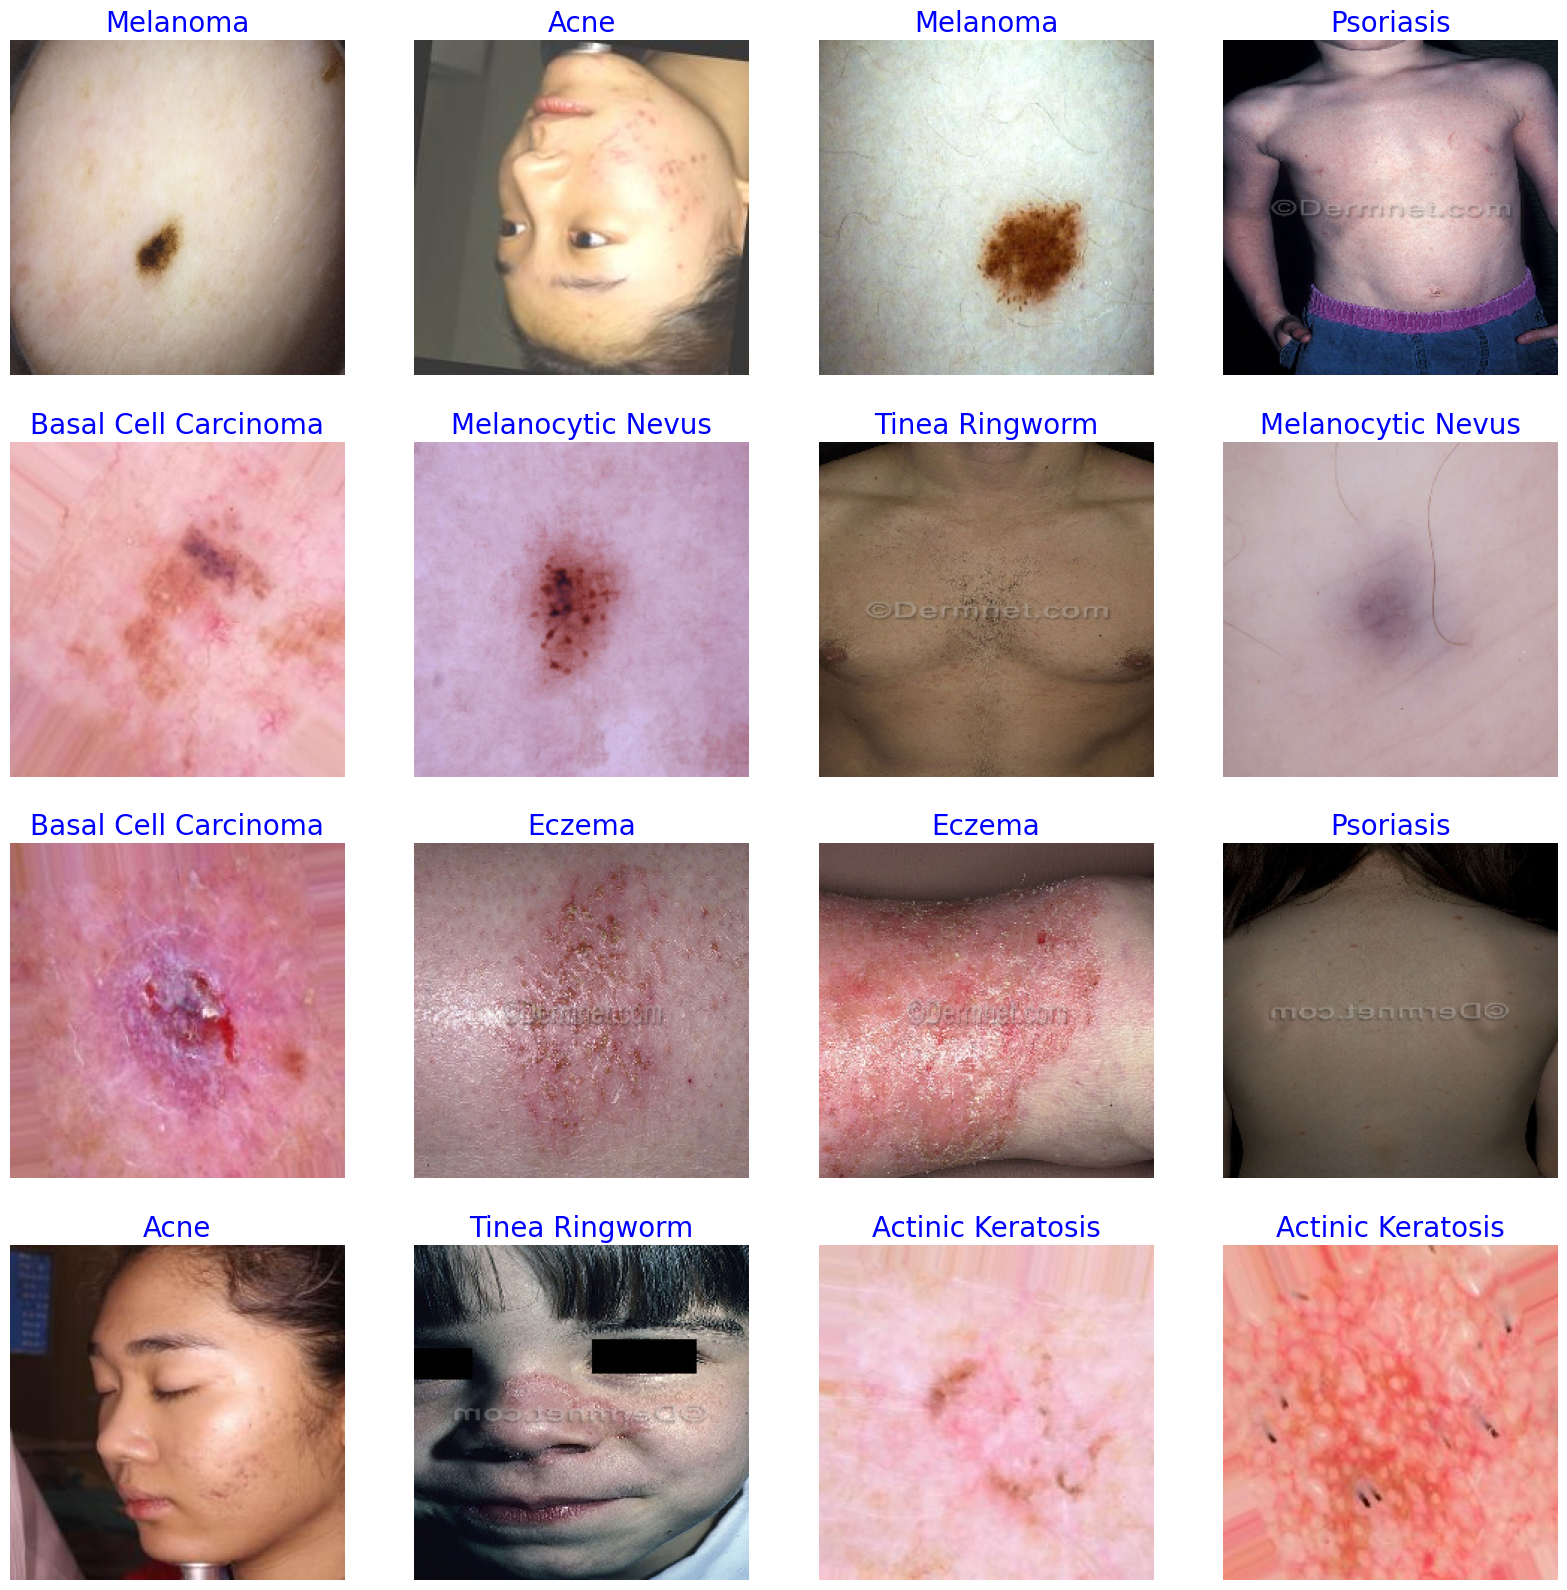

In [ ]:
show_images(train_gen)

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                         

In [ ]:
batch_size = 40   # set batch size for training
epochs = 30   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [ ]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
y
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /30     5.964   69.601   3.79167  79.974   0.00100  0.00100  accuracy     0.00    274.15 
 2 /30     2.678   82.630   1.78832  83.095   0.00100  0.00100  accuracy    18.72    195.54 
 3 /30     1.280   88.442   0.94091  86.996   0.00100  0.00100  accuracy     7.03    196.24 
 4 /30     0.700   91.921   0.66323  88.166   0.00100  0.00100  val_loss    29.51    196.27 
 5 /30     0.481   94.245   0.55667  89.597   0.00100  0.00100  val_loss    16.07    195.94 
enter H to halt training or an integer for number of epochs to run then ask again
5
 training will continue until epoch 10
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 6 /30     0.379   95.944   0.52977  88.882   0.00100  0.00100  val_loss     4.83    195.19 
 7 /30     0.327   96.602   0.50768  90.117   0.00100  0.00100  val_loss     

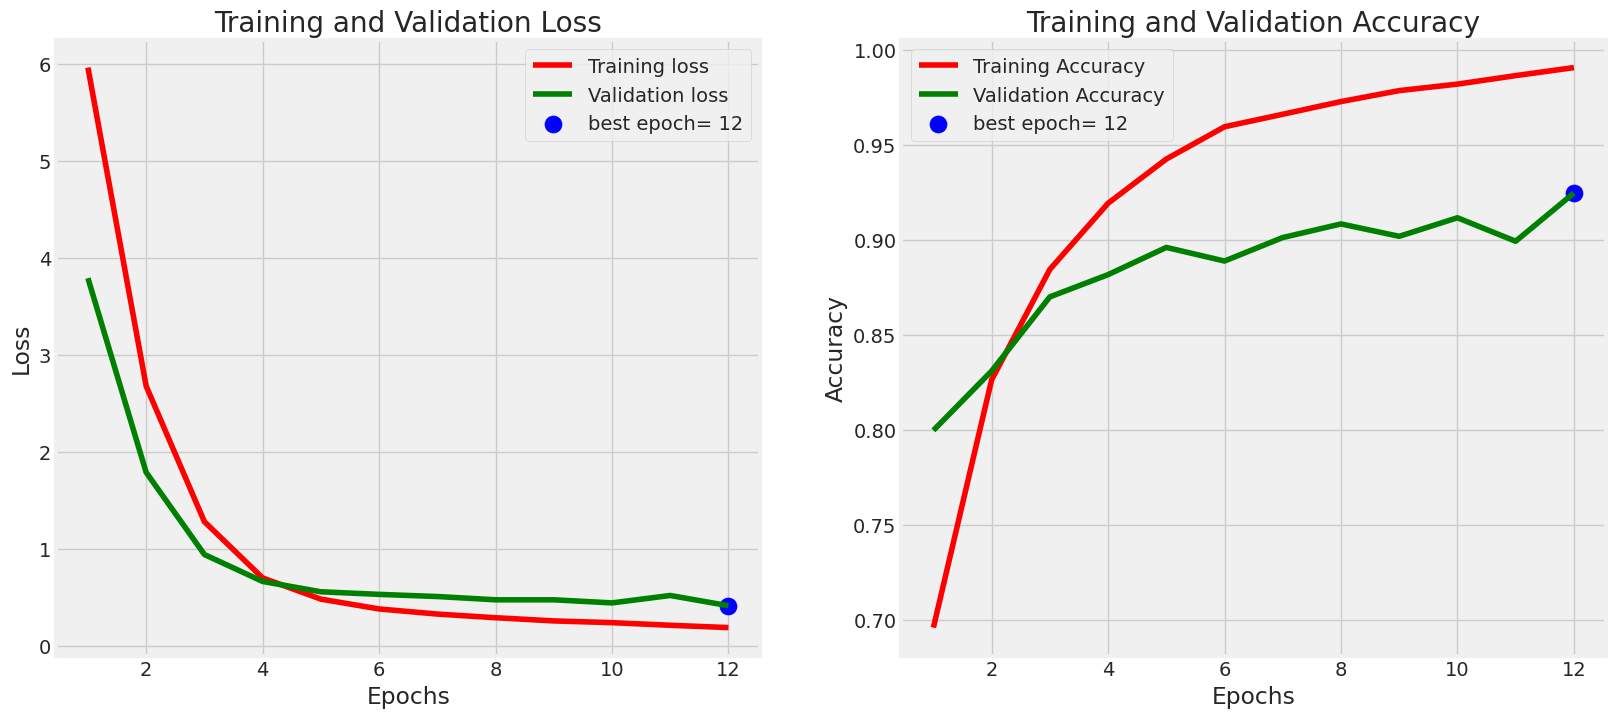

In [ ]:
plot_training(history)

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

308/769 [===========>..................] - ETA: 1:23 - loss: 0.1378 - accuracy: 0.9989

 39/769 [>.............................] - ETA: 2:00 - loss: 0.4128 - accuracy: 0.9246

769/769 [==============================] - 17s 21ms/step - loss: 0.3897 - accuracy: 0.9311
Train Loss:  0.1377670019865036
Train Accuracy:  0.9989433288574219
--------------------
Validation Loss:  0.4128463864326477
Validation Accuracy:  0.9245773553848267
--------------------
Test Loss:  0.3897269666194916
Test Accuracy:  0.9310793280601501


In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[3 3 1 ... 4 1 1]


In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                      precision    recall  f1-score   support

                Acne       1.00      0.99      1.00       200
   Actinic Keratosis       0.99      0.98      0.98       200
Basal Cell Carcinoma       0.98      0.99      0.98       200
              Eczema       0.78      0.83      0.80       168
   Melanocytic Nevus       0.99      0.98      0.99       200
            Melanoma       0.99      0.99      0.99       200
           Psoriasis       0.84      0.81      0.83       200
      Tinea Ringworm       0.85      0.84      0.84       170

            accuracy                           0.93      1538
           macro avg       0.93      0.93      0.93      1538
        weighted avg       0.93      0.93      0.93      1538



In [ ]:
def generate_confusion_matrix(model, test_gen):
    # Predict the classes for test data
    y_pred = model.predict(test_gen)
    # Extract the predicted labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    # Extract the true labels
    y_true_labels = test_gen.classes
    # Extract class names from the generator
    class_names = list(test_gen.class_indices.keys())
    # Generate the confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function to generate confusion matrix



769/769 [==============================] - 16s 20ms/step


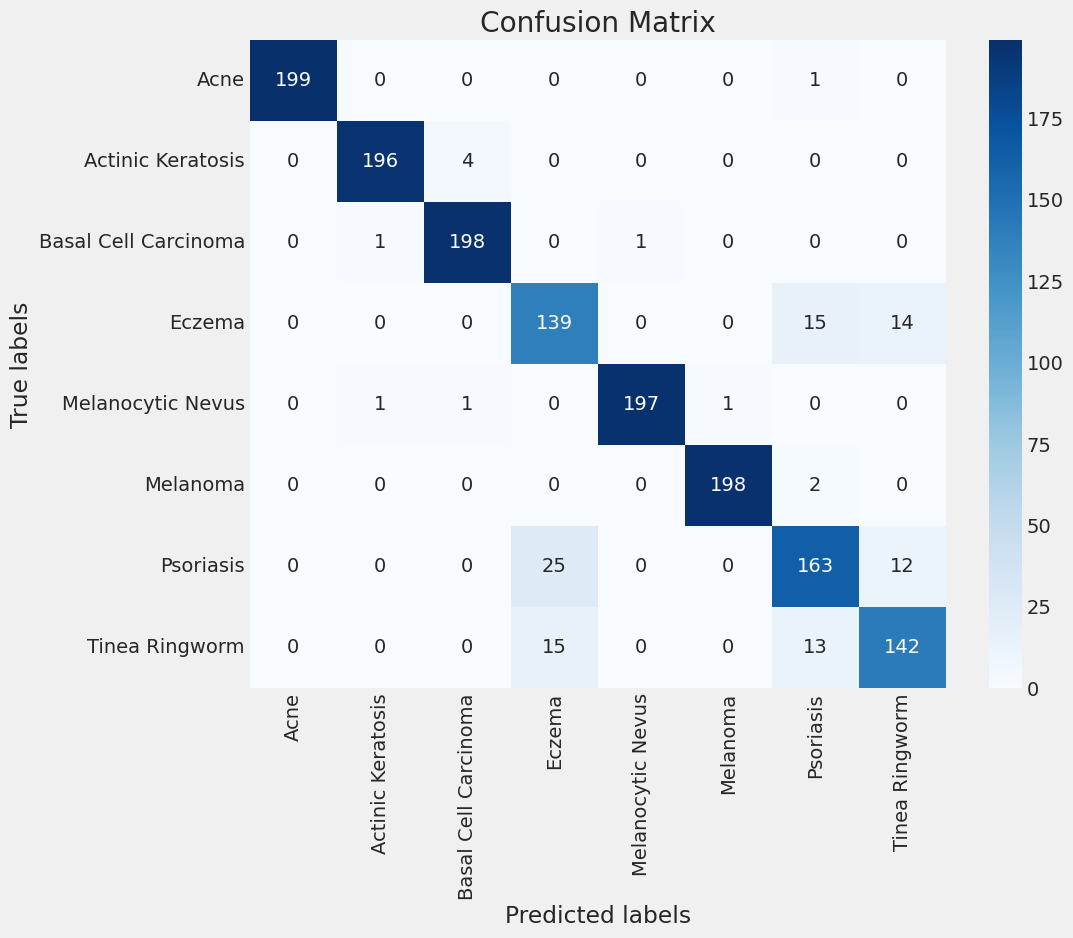

In [ ]:
generate_confusion_matrix(model, test_gen)

In [ ]:
model_name = model.input_names[0][:-6]
subject = 'Skin Disease'
acc = test_score[1] * 100
save_path = 'drive/MyDrive/kaggle'

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

model was saved as drive/MyDrive/kaggle/efficientnetb3-Skin Disease-93.11.h5
weights were saved as drive/MyDrive/kaggle/efficientnetb3-Skin Disease-weights.h5


In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'class csv file was saved as {csv_save_loc}')

class csv file was saved as drive/MyDrive/kaggle/Skin Disease-class_dict.csv


In [ ]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [ ]:
class_indices

{0: 'Acne',
 1: 'Actinic Keratosis',
 2: 'Basal Cell Carcinoma',
 3: 'Eczema',
 4: 'Melanocytic Nevus',
 5: 'Melanoma',
 6: 'Psoriasis',
 7: 'Tinea Ringworm'}

In [ ]:
json_name = f'{subject}-class_dict.json'
json_save_loc = os.path.join(save_path, json_name)
json.dump(class_indices, open(json_save_loc, 'w'))